In [1]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

> Enter the coordinates below

In [15]:
coordinates = np.array([[-0.3158552646636963 , -0.7104756832122803	, 0.804462194442749], [-0.2993728220462799,	-0.6977032423019409,	0.8416265845298767], [0.28305426239967346,	-0.6847466826438904,	0.8744586110115051], [-0.26830148696899414	,-0.672638475894928,	0.9030804634094238]] )
# coordinates = [[0, 0, 0], [0.1, 0, 0.345], [0.8, 0, 0.24], [3.9/4.5, 0, 0]] #Uncomment this line and comment the line above to observe perfect fit


#  move the coordiante frames ceneter to [-0.3158552646636963 , -0.7104756832122803	, 0.804462194442749] 
coordinates = coordinates - coordinates[0]
print(coordinates)


x, y, z = ([coordinate[0] for coordinate in coordinates],
           [coordinate[1] for coordinate in coordinates],
           [coordinate[2] for coordinate in coordinates])

[[0.         0.         0.        ]
 [0.01648244 0.01277244 0.03716439]
 [0.59890953 0.025729   0.06999642]
 [0.04755378 0.03783721 0.09861827]]


##### visualize the points

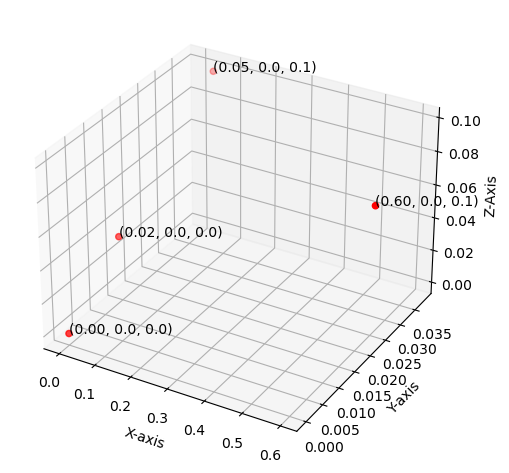

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')


for a, b, c in zip(tuple(x), tuple(y), tuple(z)):
    label = '(%.2f, %.1f, %.1f)' % (a, b, c)
    ax.text(a, b, c, label)
    
xLabel = ax.set_xlabel('X-axis', linespacing=3.2)
yLabel = ax.set_ylabel('Y-axis', linespacing=3.1)
zLabel = ax.set_zlabel('Z-Axis', linespacing=3.4)    
    
ax.scatter(x, y, z, color= 'red')
plt.show()

<img src="1_3d.jpeg" alt="1_3d.jpeg" height="500" width=300>

##### Finding the best fit plane passing though z-axis

>Equation of Plane passing through z-axis 

ax + by = 0 </br>
y = mx5</br>
<img src="4.jpeg" alt="4.jpeg" height="600" width=430> </br>
<img src="5.jpeg" alt="5.jpeg" height="600" width = 500>

> Finding optimal 'm'


In [18]:
m = ((x[0] * y[0]) + (x[1] * y[1]) + (x[2] * y[2])) / (x[0] ** 2 + x[1] ** 2 + x[2] ** 2)
print(m)

0.043513700142371055


> Plot of best fit line 

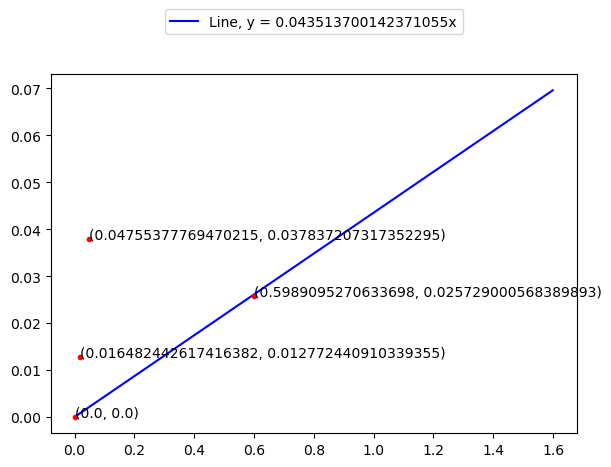

In [19]:
from turtle import color


plt.plot([0, max(x) + 1], [0, (max(x) + 1) * m], label = "Line" + ", y = " + str(m) + "x", color="blue")
plt.plot([coordinates[i][0] for i in range(0, 4)],[coordinates[i][1] for i in range(0, 4)], 'r.')

for i in range(0, 4):
       plt.text(coordinates[i][0], coordinates[i][1],'({}, {})'.format(coordinates[i][0], coordinates[i][1]))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2))
plt.show()

> Drop the perpendiculars and find the corresponding points on the line p1<sup>"</sup>, p2<sup>"</sup> and p3<sup>"</sup>

<img src="6.jpeg" alt="6.jpeg" height =600 width = 430> </br>



In [20]:
def get_perpendicular_points(a, b):
    x = (m * b + a) / (m ** 2 + 1)
    return [x, m * x]

P0_prime = [0, 0, 0]
P1_prime = get_perpendicular_points(x[1], y[1]) + [z[1]]
P2_prime = get_perpendicular_points(x[2], y[2]) + [z[2]]
P3_prime = get_perpendicular_points(x[3], y[3]) + [z[3]]


new_coordinates = [P0_prime, P1_prime, P2_prime, P3_prime]

x_new, y_new, z_new = ([coordinate[0] for coordinate in new_coordinates],
           [coordinate[1] for coordinate in new_coordinates],
           [coordinate[2] for coordinate in new_coordinates])


> Plot of the best fit plane containing the perpendiculars drawn to the plane

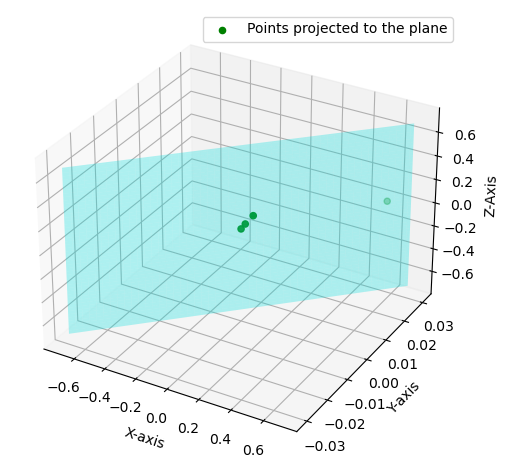

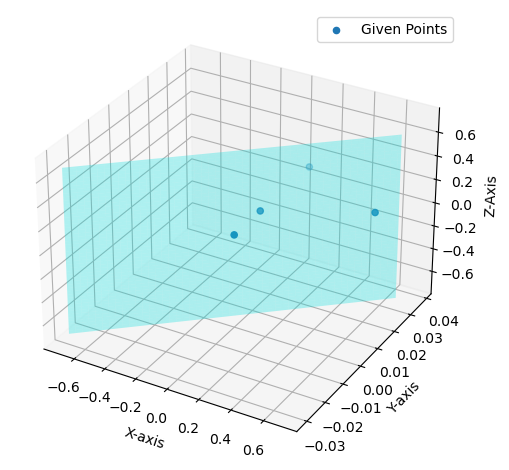

In [21]:
from pickle import TRUE


# plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

r = max(max(x_new), max(y_new), max(z_new), max(x), max(y), max(z)) + 0.1

x_c = np.linspace(-r, r, 100)
z_c = np.linspace(-r, r, 100)

x_c, z_c = np.meshgrid(x_c, z_c)

fig = plt.figure()

y_c = m * x_c

ax = fig.add_subplot(projection='3d')

ax.plot_surface(x_c, y_c, z_c, color = 'cyan',  alpha=0.3)

ax.scatter(x_new, y_new, z_new, color = 'green', label='Points projected to the plane')
# ax.scatter(x, y, z, 'r*')



xLabel = ax.set_xlabel('X-axis', linespacing=3.2)
yLabel = ax.set_ylabel('Y-axis', linespacing=3.1)
zLabel = ax.set_zlabel('Z-Axis', linespacing=3.4)
ax.legend()
plt.show()


fig = plt.figure()


ax = fig.add_subplot(projection='3d')

ax.plot_surface(x_c, y_c, z_c, color = 'cyan',  alpha=0.3, )

ax.scatter(x, y, z, 'r*', label="Given Points")

xLabel = ax.set_xlabel('X-axis', linespacing=3.2)
yLabel = ax.set_ylabel('Y-axis', linespacing=3.1)
zLabel = ax.set_zlabel('Z-Axis', linespacing=3.4)
ax.legend()

plt.show()

<img src="2_3d.jpeg" alt="2_3d.jpeg" height = 600 width = 400> </br>
<img src="3_3d.jpeg" alt="3_3d.jpeg" height = 600 width = 400> </br>


>corresponding 2d coordinates </br>
<img src="7.jpeg" alt="7.jpeg" height = 350 width = 350> </br>


In [22]:
## ax^ + by^ 

a = 1 / np.sqrt(m**2 + 1)
b = m * a


def get_2d_coordinates(x_3d, y_3d, z_3d):
    x_2d = x_3d * a + y_3d * b
    y_3d = z_3d
    
    return [x_3d, y_3d]

P0_2d = get_2d_coordinates(x_new[0], y_new[0], z_new[0])
P1_2d = get_2d_coordinates(x_new[1], y_new[1], z_new[1])
P2_2d = get_2d_coordinates(x_new[2], y_new[2], z_new[2])
P3_2d = get_2d_coordinates(x_new[3], y_new[3], z_new[3])

P_2d = [P0_2d, P1_2d, P2_2d, P3_2d]

print(P_2d)

[[0, 0], [0.017006018869193354, 0.037164390087127686], [0.598895117849397, 0.0699964165687561], [0.0491072328859694, 0.0986182689666748]]


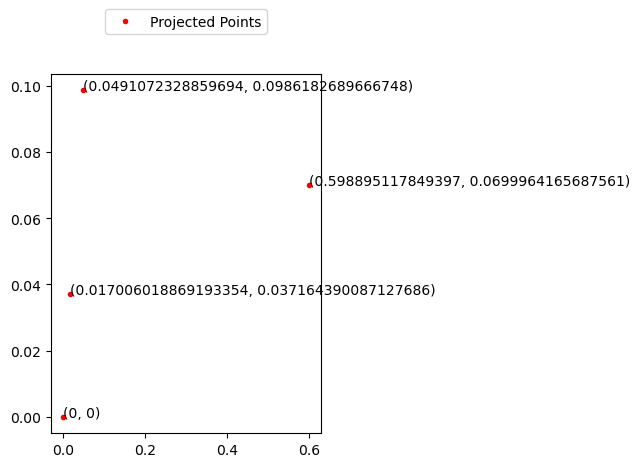

In [23]:
from turtle import color

plt.plot([P_2d[i][0] for i in range(0, 4)],[P_2d[i][1] for i in range(0, 4)], 'r.', label = "Projected Points")

for i in range(0, 4):
       plt.text(P_2d[i][0], P_2d[i][1],'({}, {})'.format(P_2d[i][0], P_2d[i][1]))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2))
plt.show()

>Let's fit the graph using the method of least squares</br>
<img src="8.jpeg" alt="8.jpeg" height="500" width=300></br>
<img src="9.jpeg" alt="9.jpeg" height="500" width=300>

In [24]:
## y = ax^2 + bx, parameter matrix = [a b] ,let us use pseudo inverse to estimate a, b.

matrix_x = np.zeros((3, 2))

for i in range(0, 3):
    matrix_x[i][0] = P_2d[i + 1][0]
    matrix_x[i][1] = matrix_x[i][0] * matrix_x[i][0]

matrix_y = np.zeros((3, 1))

for i in range(0, 3):
    matrix_y[i][0] = P_2d[i + 1][1]

parameter_matrix = np.zeros((2, 1))
parameter_matrix = (np.linalg.inv(np.transpose(matrix_x) @ matrix_x)) @ np.transpose(matrix_x) @ matrix_y

print('parameter matrix\n', parameter_matrix)

parameter matrix
 [[ 2.18529036]
 [-3.45372194]]


> Plot of best fit trajectory

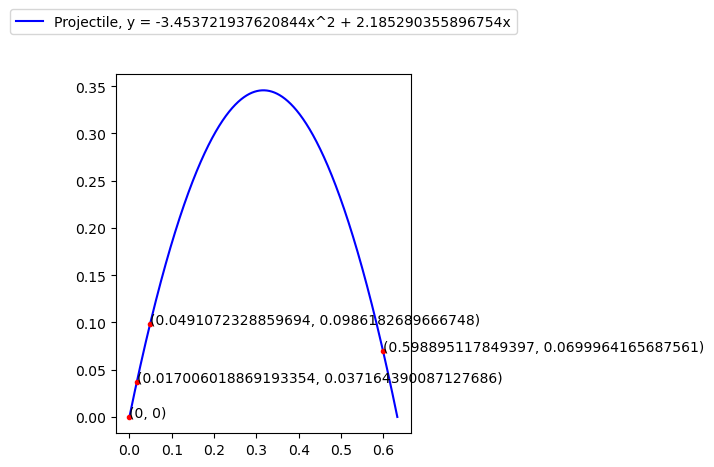

In [25]:
from cProfile import label
from turtle import color


x = np.linspace(0, (-parameter_matrix[0][0]/ parameter_matrix[1][0]), 100000)
y = parameter_matrix[1][0] * (x ** 2) + parameter_matrix[0][0] * x
plt.plot(x, y, label = "Projectile" + ", y = " + str(parameter_matrix[1][0]) + "x^2 + " + str(parameter_matrix[0][0]) + "x", color = "blue")
plt.plot([P_2d[i][0] for i in range(0, 4)],[P_2d[i][1] for i in range(0, 4)], 'r.')
for i in range(0, 4):
   plt.text(P_2d[i][0], P_2d[i][1],'({}, {})'.format(P_2d[i][0], P_2d[i][1]))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2))
plt.show()